# 1. Conduct experiment

In [ ]:
import copy

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from constraint_relax import search_mfs
from experiment_constraint_data_processor import process_experiment_constraint_data
from values import real_data_path, simulated_data_path
from similarity_calculator import compute_similarity
from utils import get_df_len

In [ ]:
def experiment(problem_list, item_path):
    result = pd.DataFrame()
    threshold_list = ['', 0, 0.25, 0.5, 0.75, 1]
    for problem in problem_list:
        prob_sol_list = dict()
        for threshold in threshold_list:
            p = copy.deepcopy(problem)
            if threshold != '':
                mfs = search_mfs(p.constraint_list, copy.copy(p.constraint_list), item_path)
                p.relax(mfs, threshold)
            prob_items = p.solve()
            prob_sol_list.update({
                f'constraint_{threshold}': [c.__dict__ for c in p.constraint_list],
                f'no_of_items_{threshold}': get_df_len(prob_items)
            })
            if not prob_items is None:
                prob_sol_list.update({
                    f'similarity_{threshold}': ((compute_similarity(p.constraint_list, prob_items, item_path))['similarity']).mean()
                })
            else:
                prob_sol_list.update({
                    f'similarity_{threshold}': 0
                })
        result = result.append(prob_sol_list, ignore_index=True)
    return result

In [ ]:
if not os.path.isdir('./experiment_result'):
    os.mkdir('./experiment_result')

real_item_problem_list = process_experiment_constraint_data('./experiment_constraint_data.csv', real_data_path)
real_item_experiment_result = experiment(real_item_problem_list, real_data_path)
real_item_experiment_result.to_csv('./experiment_result/real_item_experiment_result.csv', index=False)
simulated_item_problem_list = process_experiment_constraint_data('./experiment_constraint_data.csv', simulated_data_path)
simulated_item_experiment_result = experiment(simulated_item_problem_list, simulated_data_path)
simulated_item_experiment_result.to_csv('./experiment_result/simulated_item_experiment_result.csv', index=False)

# 2. Process Result

## 2.1 Overall Performance

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
real_result = pd.read_csv('./experiment_result/real_item_experiment_result.csv')
simulated_result = pd.read_csv('./experiment_result/simulated_item_experiment_result.csv')
results = [real_result, simulated_result]

data_result = real_result

In [33]:
def split_data_result(data_result, n):
    return data_result.loc[data_result['no_of_items_'] < n], data_result.loc[data_result['no_of_items_'] >= n]

In [34]:
constraint_cols = [c for c in data_result.columns if 'constraint_' in c]
no_of_items_cols = [c for c in data_result.columns if 'no_of_items_' in c]
similarity_cols = [c for c in data_result.columns if 'similarity_' in c]
relaxation_approaches = ['Original Constraint', 't = 0', 't = 0.25', 't = 0.5', 't = 0.75', 't = 1']

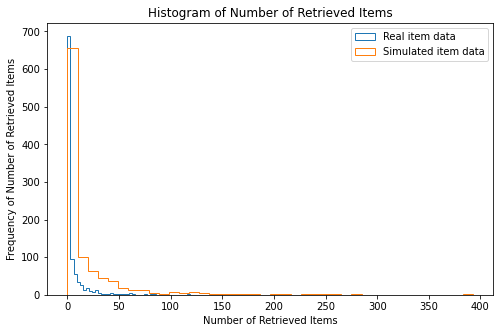

In [35]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

for data_result in results:
    plt.hist(data_result['no_of_items_'], bins=40, histtype='step')
plt.title('Histogram of Number of Retrieved Items')
plt.legend(['Real item data','Simulated item data'])
plt.xlabel('Number of Retrieved Items')
plt.ylabel('Frequency of Number of Retrieved Items')
plt.show()

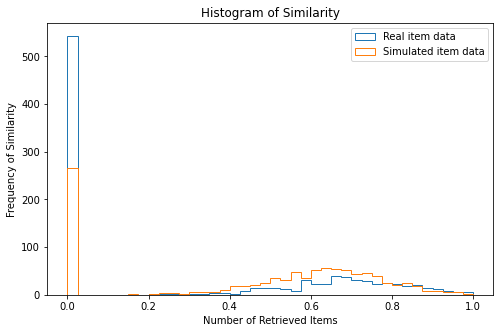

In [36]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

for data_result in results:
    plt.hist(data_result['similarity_'], bins=40, histtype='step')
plt.title('Histogram of Similarity')
plt.legend(['Real item data','Simulated item data'])
plt.xlabel('Number of Retrieved Items')
plt.ylabel('Frequency of Similarity')
plt.show()

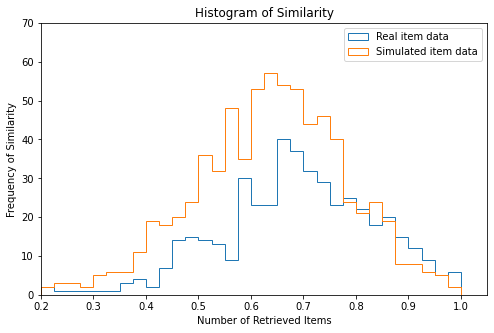

In [37]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

for data_result in results:
    plt.hist(data_result['similarity_'], bins=40, histtype='step')
plt.title('Histogram of Similarity')
plt.legend(['Real item data','Simulated item data'])
plt.xlabel('Number of Retrieved Items')
plt.ylabel('Frequency of Similarity')
plt.xlim([0.2, 1.05])
plt.ylim([0, 70])
plt.show()

In [38]:
pd.DataFrame([
    [
        (real_result.loc[real_result['no_of_items_'] < 1])['no_of_items_'].count(),
        (real_result.loc[real_result['no_of_items_'] >= 1])['no_of_items_'].count(),
    ],
    [
        (simulated_result.loc[simulated_result['no_of_items_'] < 1])['no_of_items_'].count(),
        (simulated_result.loc[simulated_result['no_of_items_'] >= 1])['no_of_items_'].count(),
    ]
], index=['real item data', 'simulated item data'], columns=['number of items < 1', 'number of items >= 1'])

,number of items < 1,number of items >= 1
real item data,543,457
simulated item data,265,735


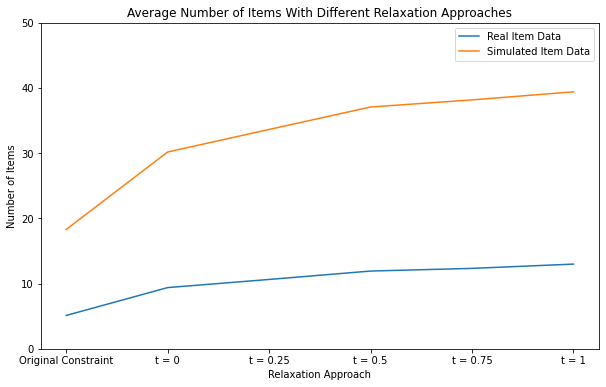

In [39]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

for data_result in results:
    plt.plot([val for val in data_result[no_of_items_cols].mean()])

plt.title('Average Number of Items With Different Relaxation Approaches')
plt.legend(['Real Item Data', 'Simulated Item Data'], loc='upper right')
plt.xticks(np.arange(0, len(no_of_items_cols)), relaxation_approaches)
plt.ylabel('Number of Items')
plt.xlabel('Relaxation Approach')
plt.ylim([0, 50])
plt.show()

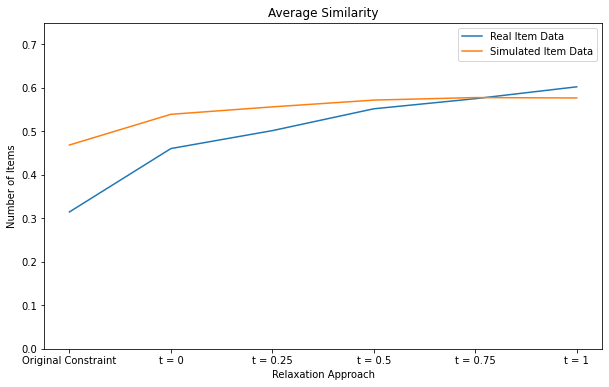

In [10]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

for data_result in results:
    plt.plot([val for val in data_result[similarity_cols].mean()])
    
plt.title('Average Similarity')
plt.legend(['Real Item Data', 'Simulated Item Data'], loc='upper right')
plt.xticks(np.arange(0, len(no_of_items_cols)), relaxation_approaches)
plt.ylabel('Number of Items')
plt.xlabel('Relaxation Approach')
plt.ylim([0, 0.75])

plt.show()

Number of Constraint Sets that Retrieved at least 1 Item from Real Item Data:


,Number of Items = 0,Number of Items > 0
Original Constraint,543,457
t = 0,292,708
t = 0.25,222,778
t = 0.5,127,873
t = 0.75,69,931
t = 1,0,1000


Frequency of Constraint Sets that Retrieved at least 1 Item from Simulated Item Data:


,Number of Items = 0,Number of Items > 0
Original Constraint,265,735
t = 0,108,892
t = 0.25,72,928
t = 0.5,29,971
t = 0.75,7,993
t = 1,0,1000


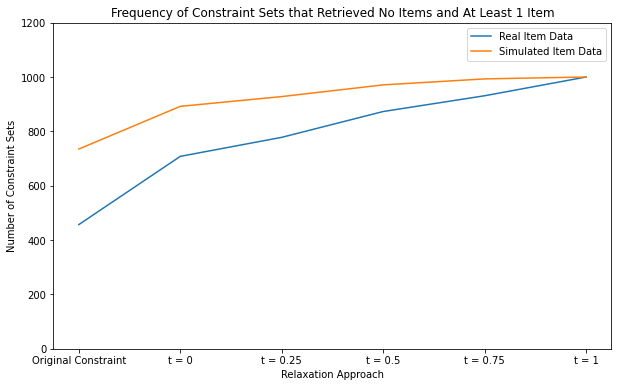

In [42]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

print('Number of Constraint Sets that Retrieved at least 1 Item from Real Item Data:')
df = pd.DataFrame([
        (real_result[real_result[no_of_items_cols] == 0])[no_of_items_cols].count(),
        (real_result[real_result[no_of_items_cols] > 0])[no_of_items_cols].count(),
    ])
df.columns = relaxation_approaches
df.index=['Number of Items = 0', 'Number of Items > 0']
df = df.T
display(df)
plt.plot(df.iloc[:, 1])

print('Frequency of Constraint Sets that Retrieved at least 1 Item from Simulated Item Data:')
df = pd.DataFrame([
        (real_result[simulated_result[no_of_items_cols] == 0])[no_of_items_cols].count(),
        (real_result[simulated_result[no_of_items_cols] > 0])[no_of_items_cols].count(),
    ])
df.columns = relaxation_approaches
df.index=['Number of Items = 0', 'Number of Items > 0']
df = df.T
display(df)
plt.plot(df.iloc[:, 1])

plt.title('Frequency of Constraint Sets that Retrieved No Items and At Least 1 Item')
plt.xlabel('Relaxation Approach')
plt.ylabel('Number of Constraint Sets')
plt.legend(['Real Item Data', 'Simulated Item Data'],)
plt.ylim([0, 1200])

plt.show()

## 2.2 Compare Performances of constraint sets that retrieved no items and at least 1 item

In [12]:
less_item_count = 4

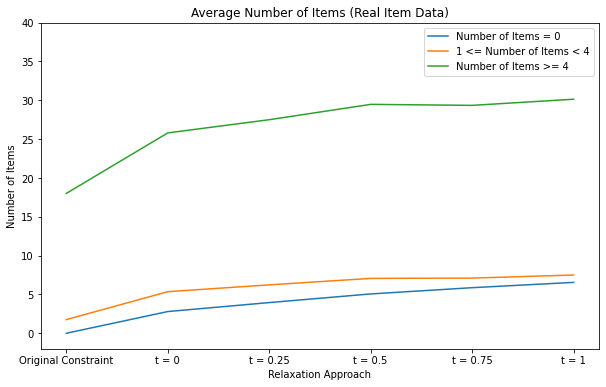

In [24]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

result_no_items, result_items_more = split_data_result(real_result, 1)
result_items_less, result_items_more = split_data_result(result_items_more, less_item_count)
plt.plot([val for val in result_no_items[no_of_items_cols].mean()])
plt.plot([val for val in result_items_less[no_of_items_cols].mean()])
plt.plot([val for val in result_items_more[no_of_items_cols].mean()])

plt.title('Average Number of Items (Real Item Data)')
plt.legend(['Number of Items = 0', f'1 <= Number of Items < {less_item_count}', f'Number of Items >= {less_item_count}'], loc='upper right')
plt.xticks(np.arange(0, len(no_of_items_cols)), relaxation_approaches)
plt.ylabel('Number of Items')
plt.xlabel('Relaxation Approach')
plt.ylim([-2, 40])

plt.show()

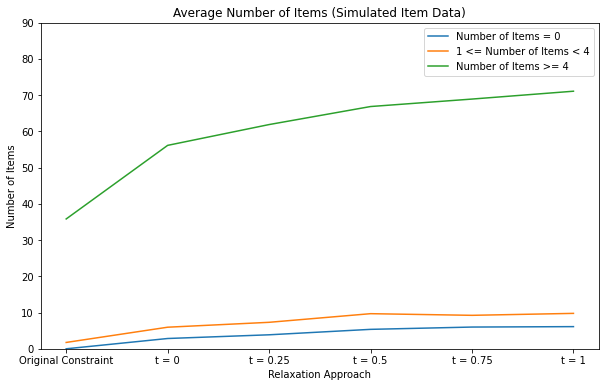

In [14]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

result_no_items, result_items_more = split_data_result(simulated_result, 1)
result_items_less, result_items_more = split_data_result(result_items_more, less_item_count)
plt.plot([val for val in result_no_items[no_of_items_cols].mean()])
plt.plot([val for val in result_items_less[no_of_items_cols].mean()])
plt.plot([val for val in result_items_more[no_of_items_cols].mean()])

plt.title('Average Number of Items (Simulated Item Data)')
plt.legend(['Number of Items = 0', f'1 <= Number of Items < {less_item_count}', f'Number of Items >= {less_item_count}'], loc='upper right')
plt.xticks(np.arange(0, len(no_of_items_cols)), relaxation_approaches)
plt.ylabel('Number of Items')
plt.xlabel('Relaxation Approach')
plt.ylim([0, 90])

plt.show()

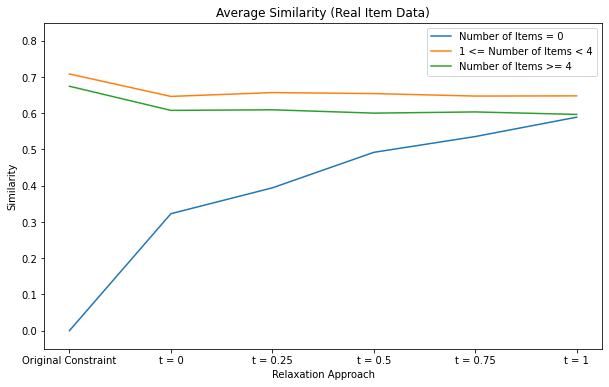

In [15]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

result_no_items, result_items_more = split_data_result(real_result, 1)
result_items_less, result_items_more = split_data_result(result_items_more, less_item_count)
plt.plot([val for val in result_no_items[similarity_cols].mean()])
plt.plot([val for val in result_items_less[similarity_cols].mean()])
plt.plot([val for val in result_items_more[similarity_cols].mean()])

plt.title('Average Similarity (Real Item Data)')
plt.legend(['Number of Items = 0', f'1 <= Number of Items < {less_item_count}', f'Number of Items >= {less_item_count}'], loc='upper right')
plt.xticks(np.arange(0, len(no_of_items_cols)), relaxation_approaches)
plt.ylabel('Similarity')
plt.xlabel('Relaxation Approach')
plt.ylim([-0.05, 0.85])

plt.show()

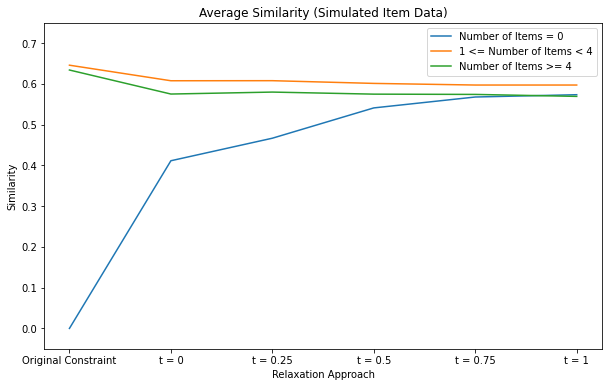

In [16]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

result_no_items, result_items_more = split_data_result(simulated_result, 1)
result_items_less, result_items_more = split_data_result(result_items_more, less_item_count)
plt.plot([val for val in result_no_items[similarity_cols].mean()])
plt.plot([val for val in result_items_less[similarity_cols].mean()])
plt.plot([val for val in result_items_more[similarity_cols].mean()])

plt.title('Average Similarity (Simulated Item Data)')
plt.legend(['Number of Items = 0', f'1 <= Number of Items < {less_item_count}', f'Number of Items >= {less_item_count}'], loc='upper right')
plt.xticks(np.arange(0, len(no_of_items_cols)), relaxation_approaches)
plt.ylabel('Similarity')
plt.xlabel('Relaxation Approach')
plt.ylim([-0.05, 0.75])

plt.show()

In [17]:
for col in similarity_cols:
    rows_has_item = real_result[real_result[col] > 0]
    count = rows_has_item[col].count()
    sum = rows_has_item[col].sum()
    print(f'{sum} - {count} -> {sum / count}')

314.7431103218128 - 457 -> 0.6887157775094372
460.46284301469177 - 708 -> 0.6503712471958923
501.6864347905961 - 778 -> 0.6448411758233883
551.8961185789651 - 873 -> 0.632183411888849
575.1356267767401 - 931 -> 0.6177611458396779
602.466982095878 - 999 -> 0.6030700521480261


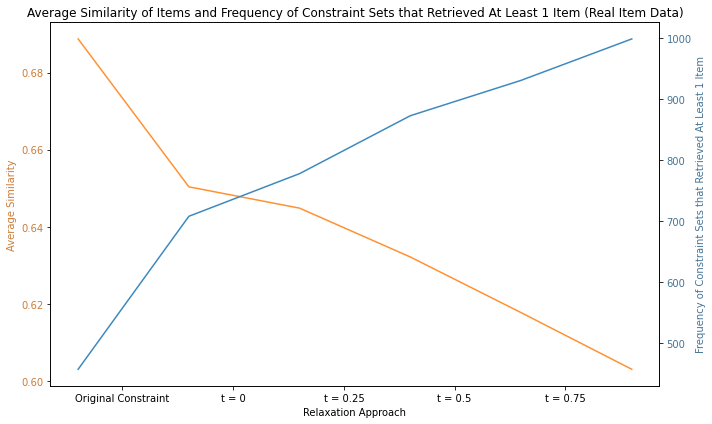

In [43]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)

color = '#ff9131'
ax1.set_xlabel('Relaxation Approach')
ax1.set_ylabel('Average Similarity', color='#cc7c37')
plt.plot((real_result[real_result[similarity_cols] > 0])[similarity_cols].mean(), color=color)
ax1.tick_params(axis='y', labelcolor='#cc7c37')
plt.xticks(np.arange(0.4,6), relaxation_approaches)

ax2 = ax1.twinx()

color = '#3d89be'
ax2.set_ylabel('Frequency of Constraint Sets that Retrieved At Least 1 Item', color='#467595')
plt.plot((real_result[real_result[similarity_cols] > 0])[similarity_cols].count(), color=color)
ax2.tick_params(axis='y', labelcolor='#467595')

plt.title('Average Similarity of Items and Frequency of Constraint Sets that Retrieved At Least 1 Item (Real Item Data)')
fig.tight_layout()
plt.show()

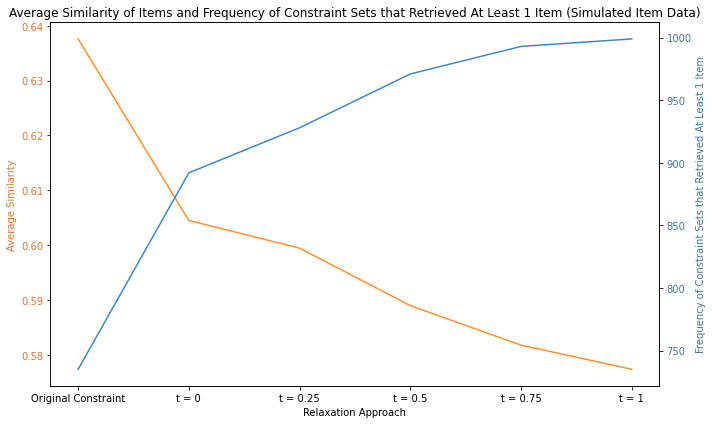

In [44]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)

color = '#ff9131'
ax1.set_xlabel('Relaxation Approach')
ax1.set_ylabel('Average Similarity', color='#cc7c37')
plt.plot((simulated_result[simulated_result[similarity_cols] > 0])[similarity_cols].mean(), color=color)
ax1.tick_params(axis='y', labelcolor='#cc7c37')
plt.xticks(np.arange(0,6), relaxation_approaches)

ax2 = ax1.twinx()

color = '#3d89be'
ax2.set_ylabel('Frequency of Constraint Sets that Retrieved At Least 1 Item', color='#467595')
plt.plot((simulated_result[simulated_result[similarity_cols] > 0])[similarity_cols].count(), color=color)
ax2.tick_params(axis='y', labelcolor='#467595')

plt.title('Average Similarity of Items and Frequency of Constraint Sets that Retrieved At Least 1 Item (Simulated Item Data)')
fig.tight_layout()
plt.show()